In [20]:
""" Import of modules """
import numpy.random as np
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from tqdm import tqdm_notebook as tqdm
sns.set()

""" Initialization """
Npop = 100000 #Population size
parr = numpy.exp(numpy.arange(-24, -14))
narr = numpy.exp(numpy.arange(14, 25))
gmean = numpy.array([-1, -0.5, 0, 0.5, 1, 1.5, 2])
gvar = numpy.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
# rep = 100

ndiv = 10 #Number of cell divisions per year
age = 150 #Lifespan
time = ndiv*age #Duration of the simulation
wts = numpy.array([0.013818048555027355, 0.0553159434123515, 0.07253241028642805, 0.07303103455912367, 0.07216711636515384, 0.06647847243710951, 0.06452984736662379, 0.07104508339877749, 0.08076197744193335, 0.08185169462960405, 0.07211714069611326, 0.06271758577923968, 0.048454493422914295, 0.038794489715138394, 0.034263609991378986, 0.03177168658747205, 0.026997999757072733, 0.017842803104216928, 0.01550856249432107]) #Weights from the US 2000 standard population
n_class = len(wts)
crc, cmc, crr, marr = numpy.zeros(len(parr)*age).reshape(len(parr),age), numpy.zeros(len(parr)*age).reshape(len(parr),age), numpy.zeros(len(parr)*age).reshape(len(parr),age), numpy.zeros(len(parr)*time).reshape(len(parr),time)
# aa_rate = numpy.zeros(len(parr))

""" Main simulation """
# np_flag = 0
# for p in tqdm(gvar, desc='Var(g)', leave=False):
n = narr[6]
# p = parr[6]
threshold = 5
flag = 0
for p in tqdm(parr, desc='Mutation rate', leave=False):
    growth_rate = np.normal(0, 0.5, Npop) #Growth rate distribution
    cancer_count = numpy.zeros(age) #Age-wise incidence of cancer
    num_surv = numpy.zeros(age) #Number of survivors in each age/generation
    cancer_fract = numpy.zeros(age) #Normalized incidence of cancer
    cumul_count = numpy.zeros(age) #Cumulative count of cancer
    crude_rate = numpy.zeros(age) #Calculated age-wise incidence per 100000
    #     cancer_time = numpy.zeros(Npop)
    #         g_initial = []
    # age_rate=numpy.zeros((19)) #Age-specific rates adjusted to the US 2000 standard population

    for j in tqdm(range(Npop), desc='Npop', leave=False):
        t=0 #Index to track time
        n_mut=numpy.zeros(time, dtype=int)
        m=numpy.zeros(threshold+1) #Initial cell populations
        m[0]=n
        p_mut=1-((1-p)**m[0]) #Initial probabiltiy of first mutation arising in the population

        g_inc = math.fabs(growth_rate[j])
        d = g_inc/10
        g = numpy.array([0.1, 0.1+g_inc, 0.1+(g_inc*2), 0.1+(g_inc*3), 0.1+(g_inc*4), 0.1+(g_inc*5)]) #Growth rate progression

        for t in range(time):

            n_mut[t]=n_mut[t-1 or 0]

            if (p_mut > np.random_sample())*(n_mut[t] < 5): #New mutant population
                n_mut[t] += 1
                m[n_mut[t]] = 1.0
                p_mut = 1-((1-p)**m[n_mut[t]])
                m[n_mut[t]-1] -= 1.0

            elif (g < 0).any(): #Negative growth is physiologically undefined and mathematically unbounded
                break

            elif n_mut[t] > 0: #Growth of existing mutant or normal population, as the case may be
                m += ((m*g*(n-m.sum())/n) - m*d)
    #             n += (n*1*(k-n-m.sum())/k) - n*d
                p_mut = 1-((1-p)**m[n_mut[t]])
    #             m_inc = math.copysign(1.0, g)*math.fabs(m*g*(1-(m/n)))
    #             m += 0.05*m_inc

            if n_mut[t] == 5: #Recording actual cancer cases
                cancer_count[int(t/ndiv)] += 1
    #                 cancer_time[j] = int(t/ndiv)
                break

    """ Calculations """
    cumul_count = cancer_count.cumsum()

    num_surv = numpy.array([Npop]*age, dtype=float)
    num_surv[1:] -= cumul_count[:-1]

    cancer_fract = cancer_count/(cancer_count+num_surv)
    crude_rate = cancer_fract*100000

    # num_surv[0]=Npop
    # for t in range(1, age):
    #     num_surv[t]=num_surv[t-1]-cancer_count[t-1] #Number of individuals surviving at given age
    #     cumul_count[t]=cumul_count[t-1] + cancer_count[t]

    # t=0
    # while (t <= (age-1) and num_surv[t] != 0 ):
    #     cancer_fract[t]=cancer_count[t] / (cancer_count[t]+num_surv[t]) #Fraction of surviving population getting cancer
    #     crude_rate[t]=cancer_fract[t]*100000
    #     t+=1

    # numsurv_bin, cc_bin, crr_bin, cf_bin, age_rate = numpy.zeros(n_class), numpy.zeros(n_class), numpy.zeros(n_class), numpy.zeros(n_class), numpy.zeros(n_class)
    # age_rate[0]=cancer_count[0]
    # age_rate[1]=sum(cancer_count[1:4])
    # age_rate[-1]=sum(cancer_count[85:len(cancer_count)])
    # for i in range(2,18):
    #     age_rate[i]=sum(cancer_count[(5*(i-1)):(5*(i-1)+4)])

    # numsurv_bin[0] = Npop
    # for t in range(1, n_class):
    #     numsurv_bin[t] = numsurv_bin[t-1] - age_rate[t-1]
    #     cc_bin[t] = cc_bin[t-1] + age_rate[t]

    # #     cf_bin = age_rate/(age_rate+numsurv_bin)
    # #     crr_bin = cf_bin*10000
    # t = 0
    # while (t <= (n_class-1) and numsurv_bin[t] != 0):
    #     cf_bin[t] = age_rate[t] / (age_rate[t]+numsurv_bin[t])
    #     crr_bin[t] = cf_bin[t]*100000
    #     t += 1

    crc[flag] = cancer_count[:]
    cmc[flag] = cumul_count[:]
    crr[flag] = crude_rate[:]
#     aa_rate[flag] = (crr_bin*wts).sum()
    flag += 1

/home/iiser/.local/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: overflow encountered in double_scalars
/home/iiser/.local/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: overflow encountered in multiply
/home/iiser/.local/lib/python3.6/site-packages/numpy/core/_methods.py:36: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
/home/iiser/.local/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in multiply
/home/iiser/.local/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in subtract


Text(0,0.5,'$Age\\ at\\ \\frac{I_{max}}{2}$')

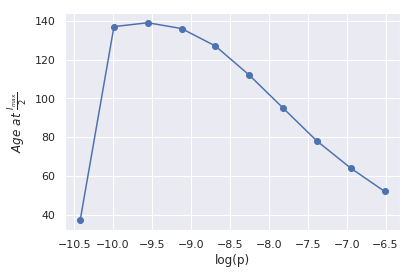

In [32]:
half_age_parr = numpy.zeros(len(parr))
for i in range(len(parr)):
    half_age_parr[i] = numpy.less_equal(cmc[i], cmc[i,-1]/2).sum()

plt.plot(numpy.log10(parr), half_age_parr, 'o-')
plt.xlabel('log(p)')
plt.ylabel(r'$Age\ at\ \frac{I_{max}}{2}$')
# plt.savefig('/home/iiser/PhD/Research/cancer_project/cancer_incidence_model/linear_model/V2/figures/22Aug2018/linear_v2_halfmax_gvar.svg')

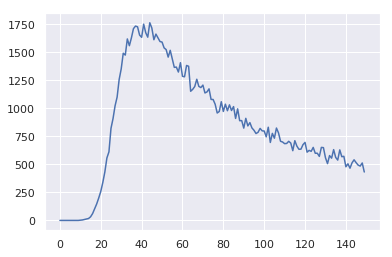

In [41]:
plt.plot(crr[-1])

In [35]:
parr

array([3.77513454e-11, 1.02618796e-10, 2.78946809e-10, 7.58256043e-10,
       2.06115362e-09, 5.60279644e-09, 1.52299797e-08, 4.13993772e-08,
       1.12535175e-07, 3.05902321e-07])

In [34]:
half_age_parr

array([ 37., 137., 139., 136., 127., 112.,  95.,  78.,  64.,  52.])

Text(0,0.5,'$I_{max}$')

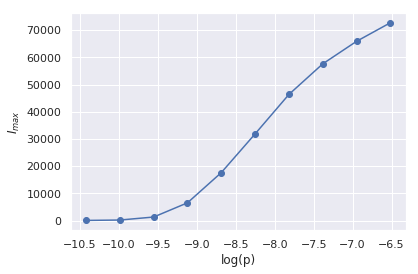

In [26]:
plt.plot(numpy.log10(parr), cmc[:,-1], 'o-')
plt.xlabel('log(p)')
plt.ylabel(r'$I_{max}$')
# plt.savefig('/home/iiser/PhD/Research/cancer_project/cancer_incidence_model/linear_model/V2/figures/22Aug2018/linear_v2_incidence_cumulmax_gvar.svg')

Text(0,0.5,'Crude incidence')

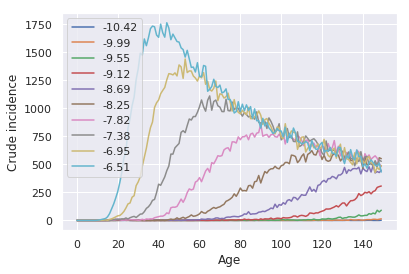

In [29]:
for i,l  in zip(crr, numpy.log10(parr).round(decimals=2)):
    plt.plot(i, label=l)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Crude incidence')
# plt.savefig('/home/iiser/PhD/Research/cancer_project/cancer_incidence_model/linear_model/V2/figures/22Aug2018/linear_v2_cumulative_incidence_gvar.svg')

In [ ]:
# mdata = pd.DataFrame(marr.T)
# mdata.columns = gvar
# mdata.columns.names = [r'$\sigma_{g}$']
# mdata.index.names = ['m']

# ax = sns.boxplot(data=(mdata/n).where(mdata!=0))
# ax = sns.stripplot(data=(mdata/n).where(mdata!=0), color='.2', alpha=0.5, marker='.', jitter=True)
# # plt.savefig('/home/iiser/PhD/Research/cancer_project/cancer_incidence_model/linear_model/V2/figures/22Aug2018/linear_v2_mnratio_gvar.svg')

# ax = sns.boxplot(data=mdata.where(mdata!=0))
# ax = sns.stripplot(data=mdata.where(mdata!=0), color='.2', alpha=0.5, marker='.', jitter=True)
# plt.savefig('/home/iiser/PhD/Research/cancer_project/cancer_incidence_model/linear_model/V2/figures/22Aug2018/linear_v2_m_gvar.svg')